**WAHYU PEBRIANTO**

In [64]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

import seaborn as sns

**1. READ DATASET**

In [65]:
train = pd.read_csv('/content/sample_data/train.tsv',sep = '\t')
test = pd.read_csv('/content/sample_data/test.tsv',sep = '\t')
df = pd.concat([train, test])
print('data training :',train.shape)
print('data testing :',test.shape)

data training : (156060, 4)
data testing : (66292, 3)


In [66]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


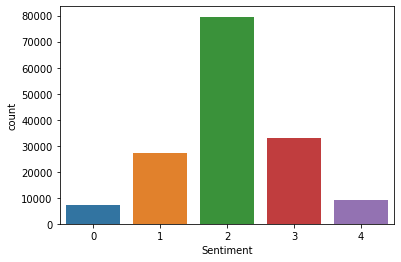

In [67]:
sns.countplot(x='Sentiment', data = train)

0 - negative

1 - somewhat negative

2 - neutral

3 - somewhat positive

4 - positive

In [68]:
column=train.columns

In [69]:
X=train['Phrase']
y=train['Sentiment']
print(X.shape,y.shape)

(156060,) (156060,)


In [70]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.25, random_state=1000)

**2. PREPROCESSING**

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
vectorizer.vocabulary_

{'insufferably': 7034,
 'when': 14861,
 'are': 784,
 'bears': 1219,
 'and': 625,
 'they': 13523,
 'like': 7858,
 'humans': 6551,
 'only': 9269,
 'hairier': 6075,
 'would': 15082,
 'tax': 13353,
 'einstein': 4281,
 'brain': 1673,
 'll': 7937,
 'it': 7224,
 'one': 9263,
 'interest': 7075,
 'lrb': 8041,
 'has': 6186,
 'rrb': 11375,
 'the': 13490,
 'marquis': 8257,
 'auteil': 991,
 'compelling': 2641,
 'french': 5442,
 'psychological': 10447,
 'drama': 4022,
 'examining': 4684,
 'encounter': 4404,
 'of': 9219,
 'an': 605,
 'aloof': 527,
 'father': 4979,
 'his': 6376,
 'chilly': 2279,
 'son': 12425,
 'after': 409,
 '20': 72,
 'years': 15147,
 'apart': 710,
 'eventual': 4645,
 'dvd': 4163,
 'release': 10934,
 'into': 7117,
 'too': 13703,
 'many': 8219,
 'pointless': 10028,
 'situations': 12148,
 'more': 8717,
 'smarts': 12291,
 'constraints': 2820,
 'cheat': 2224,
 'in': 6780,
 'end': 4413,
 'burkinabe': 1853,
 'celluloid': 2126,
 'garbage': 5601,
 'year': 15144,
 '2002': 75,
 'conjured': 27

In [73]:
X_train = vectorizer.transform(X_train)
X_val  = vectorizer.transform(X_val)

**3. MODELING SIMPLE**

**1. LogisticRegression**

**Accuracy: 0.6433935665769576**

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_val, y_val)

print("Accuracy:", score)

Accuracy: 0.6433935665769576


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**# 4. LSTM dengan Keras**

**word to vector**

In [90]:
    from keras.preprocessing.text import Tokenizer
    from keras.preprocessing.sequence import pad_sequences
    from keras.utils import to_categorical
    from keras.optimizers import Adam

In [91]:
def format_data(train, test, max_features, maxlen):
    train = train.sample(frac=1).reset_index(drop=True)
    train['Phrase'] = train['Phrase'].apply(lambda x: x.lower())
    test['Phrase'] = test['Phrase'].apply(lambda x: x.lower())

    X = train['Phrase']
    test_X = test['Phrase']
    Y = to_categorical(train['Sentiment'].values)

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(X))

    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=maxlen)
    test_X = tokenizer.texts_to_sequences(test_X)
    test_X = pad_sequences(test_X, maxlen=maxlen)

    return X, Y, test_X

In [92]:
maxlen = 125
max_features = 10000

X, Y, test_X = format_data(train, test, max_features, maxlen)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=1000)

In [94]:
model = Sequential()


model.add(Embedding(max_features,100,mask_zero=True))
model.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          42240     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,054,821
Trainable params: 1,054,821
Non-trainable params: 0
_________________________________________________________________


In [95]:
epochs = 5
batch_size = 32

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/5
3658/3658 [==============================] - 1370s 373ms/step - loss: 1.1434 - accuracy: 0.5621 - val_loss: 0.8783 - val_accuracy: 0.6455
Epoch 2/5
3658/3658 [==============================] - 1356s 371ms/step - loss: 0.8394 - accuracy: 0.6607 - val_loss: 0.8465 - val_accuracy: 0.6576
Epoch 3/5
3658/3658 [==============================] - 1363s 373ms/step - loss: 0.7763 - accuracy: 0.6875 - val_loss: 0.8346 - val_accuracy: 0.6637
Epoch 4/5
3658/3658 [==============================] - 1362s 372ms/step - loss: 0.7341 - accuracy: 0.7016 - val_loss: 0.8269 - val_accuracy: 0.6668
Epoch 5/5
3658/3658 [==============================] - 1367s 374ms/step - loss: 0.7009 - accuracy: 0.7147 - val_loss: 0.8273 - val_accuracy: 0.6653


In [97]:
sub = pd.read_csv('/content/sample_data/sampleSubmission.csv')
sub['Sentiment'] = model.predict_classes(test_X, batch_size=batch_size, verbose=1)
sub.to_csv('submission_LSTM.csv', index=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2072/2072 [==============================] - 92s 44ms/step
